In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

XGBoost = xgboost.XGBRFClassifier()
Rand_forest = RandomForestClassifier()
svm = SVC()
Dtree = DecisionTreeClassifier()

In [7]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

In [8]:
import xgboost

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv(r'C:\Users\swathi\Downloads\Dataset - Dataset.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01    Delhi     13.4     22.9       0.6          NaN   
1       2008-12-02    Delhi      7.4     25.1       0.0          NaN   
2       2008-12-03    Delhi     12.9     25.7       0.0          NaN   
3       2008-12-04    Delhi      9.2     28.0       0.0          NaN   
4       2008-12-05    Delhi     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [11]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [12]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

//Handling Missing values//

In [14]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [15]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [16]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [18]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [19]:
data

Date Location  MinTemp    MaxTemp  Rainfall  WindGustSpeed  \
0       2008-12-01    Delhi     13.4  22.900000       0.6       44.00000   
1       2008-12-02    Delhi      7.4  25.100000       0.0       44.00000   
2       2008-12-03    Delhi     12.9  25.700000       0.0       46.00000   
3       2008-12-04    Delhi      9.2  28.000000       0.0       24.00000   
4       2008-12-05    Delhi     17.5  32.300000       1.0       41.00000   
...            ...      ...      ...        ...       ...            ...   
145455  2017-06-21    Uluru      2.8  23.400000       0.0       31.00000   
145456  2017-06-22    Uluru      3.6  25.300000       0.0       22.00000   
145457  2017-06-23    Uluru      5.4  26.900000       0.0       37.00000   
145458  2017-06-24    Uluru      7.8  27.000000       0.0       28.00000   
145459  2017-06-25    Uluru     14.9  23.221348       0.0       40.03523   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Temp9am  Temp3pm RainTomorrow  
0            1007.1     16.9     21.8           No  
1            1007.8     17.2     24.3           No  
2            1008.7     21.0     23.2           No  
3            1012.8     18.1     26.5           No  
4            1006.0     17.8     29.7           No  
...             ...      ...      ...          ...  
145455       1020.3     10.1     22.4           No  
145456       1019.1     10.9     24.5           No  
145457       1016.8     12.5     26.1           No  
145458       1016.5     15.1     26.0           No  
145459       1017.9     15.0     20.9           No  

[145460 rows x 15 columns]

In [20]:
cat_names = data_cat.columns
cat_names

Index(['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mode

SimpleImputer(strategy='most_frequent')

In [22]:
data_cat = imp_mode.fit_transform(data_cat)
data_cat

array([['No', 'W', 'W', 'WNW'],
       ['No', 'WNW', 'NNW', 'WSW'],
       ['No', 'WSW', 'W', 'WSW'],
       ...,
       ['No', 'N', 'SE', 'WNW'],
       ['No', 'SE', 'SSE', 'N'],
       ['No', 'W', 'ESE', 'ESE']], dtype=object)

In [23]:
data_cat=pd.DataFrame(data_cat,columns=cat_names)

In [24]:
data=pd.concat([data,data_cat],axis=1)

In [25]:
data.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733400  0.102706       0.172553      0.173404   
MaxTemp        0.733400  1.000000 -0.074040       0.065895      0.014294   
Rainfall       0.102706 -0.074040  1.000000       0.126446      0.085925   
WindGustSpeed  0.172553  0.065895  0.126446       1.000000      0.577319   
WindSpeed9am   0.173404  0.014294  0.085925       0.577319      1.000000   
WindSpeed3pm   0.173058  0.049717  0.056527       0.657243      0.512427   
Humidity9am   -0.230970 -0.497927  0.221380      -0.207964     -0.268271   
Humidity3pm    0.005995 -0.498760  0.248905      -0.025355     -0.030887   
Pressure9am   -0.423584 -0.308309 -0.159055      -0.425760     -0.215339   
Pressure3pm   -0.433147 -0.396622 -0.119541      -0.383938     -0.165388   
Temp9am        0.897692  0.879170  0.011069       0.145904      0.127592   
Temp3pm        0.699211  0.968713 -0.077684       0.031884      0.004476   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.173058    -0.230970     0.005995    -0.423584   
MaxTemp            0.049717    -0.497927    -0.498760    -0.308309   
Rainfall           0.056527     0.221380     0.248905    -0.159055   
WindGustSpeed      0.657243    -0.207964    -0.025355    -0.425760   
WindSpeed9am       0.512427    -0.268271    -0.030887    -0.215339   
WindSpeed3pm       1.000000    -0.143458     0.016275    -0.277604   
Humidity9am       -0.143458     1.000000     0.659072     0.131503   
Humidity3pm        0.016275     0.659072     1.000000    -0.025848   
Pressure9am       -0.277604     0.131503    -0.025848     1.000000   
Pressure3pm       -0.239659     0.176009     0.048695     0.959662   
Temp9am            0.161060    -0.469641    -0.216964    -0.397131   
Temp3pm            0.027587    -0.490709    -0.555608    -0.265532   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.433147  0.897692  0.699211  
MaxTemp          -0.396622  0.879170  0.968713  
Rainfall         -0.119541  0.011069 -0.077684  
WindGustSpeed    -0.383938  0.145904  0.031884  
WindSpeed9am     -0.165388  0.127592  0.004476  
WindSpeed3pm     -0.239659  0.161060  0.027587  
Humidity9am       0.176009 -0.469641 -0.490709  
Humidity3pm       0.048695 -0.216964 -0.555608  
Pressure9am       0.959662 -0.397131 -0.265532  
Pressure3pm       1.000000 -0.441459 -0.360707  
Temp9am          -0.441459  1.000000  0.846141  
Temp3pm          -0.360707  0.846141  1.000000

In [26]:
cor = data.corr()

<Axes: >

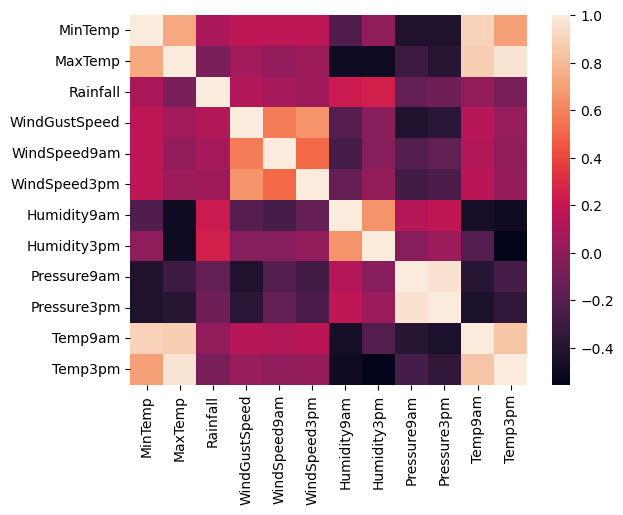

In [27]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

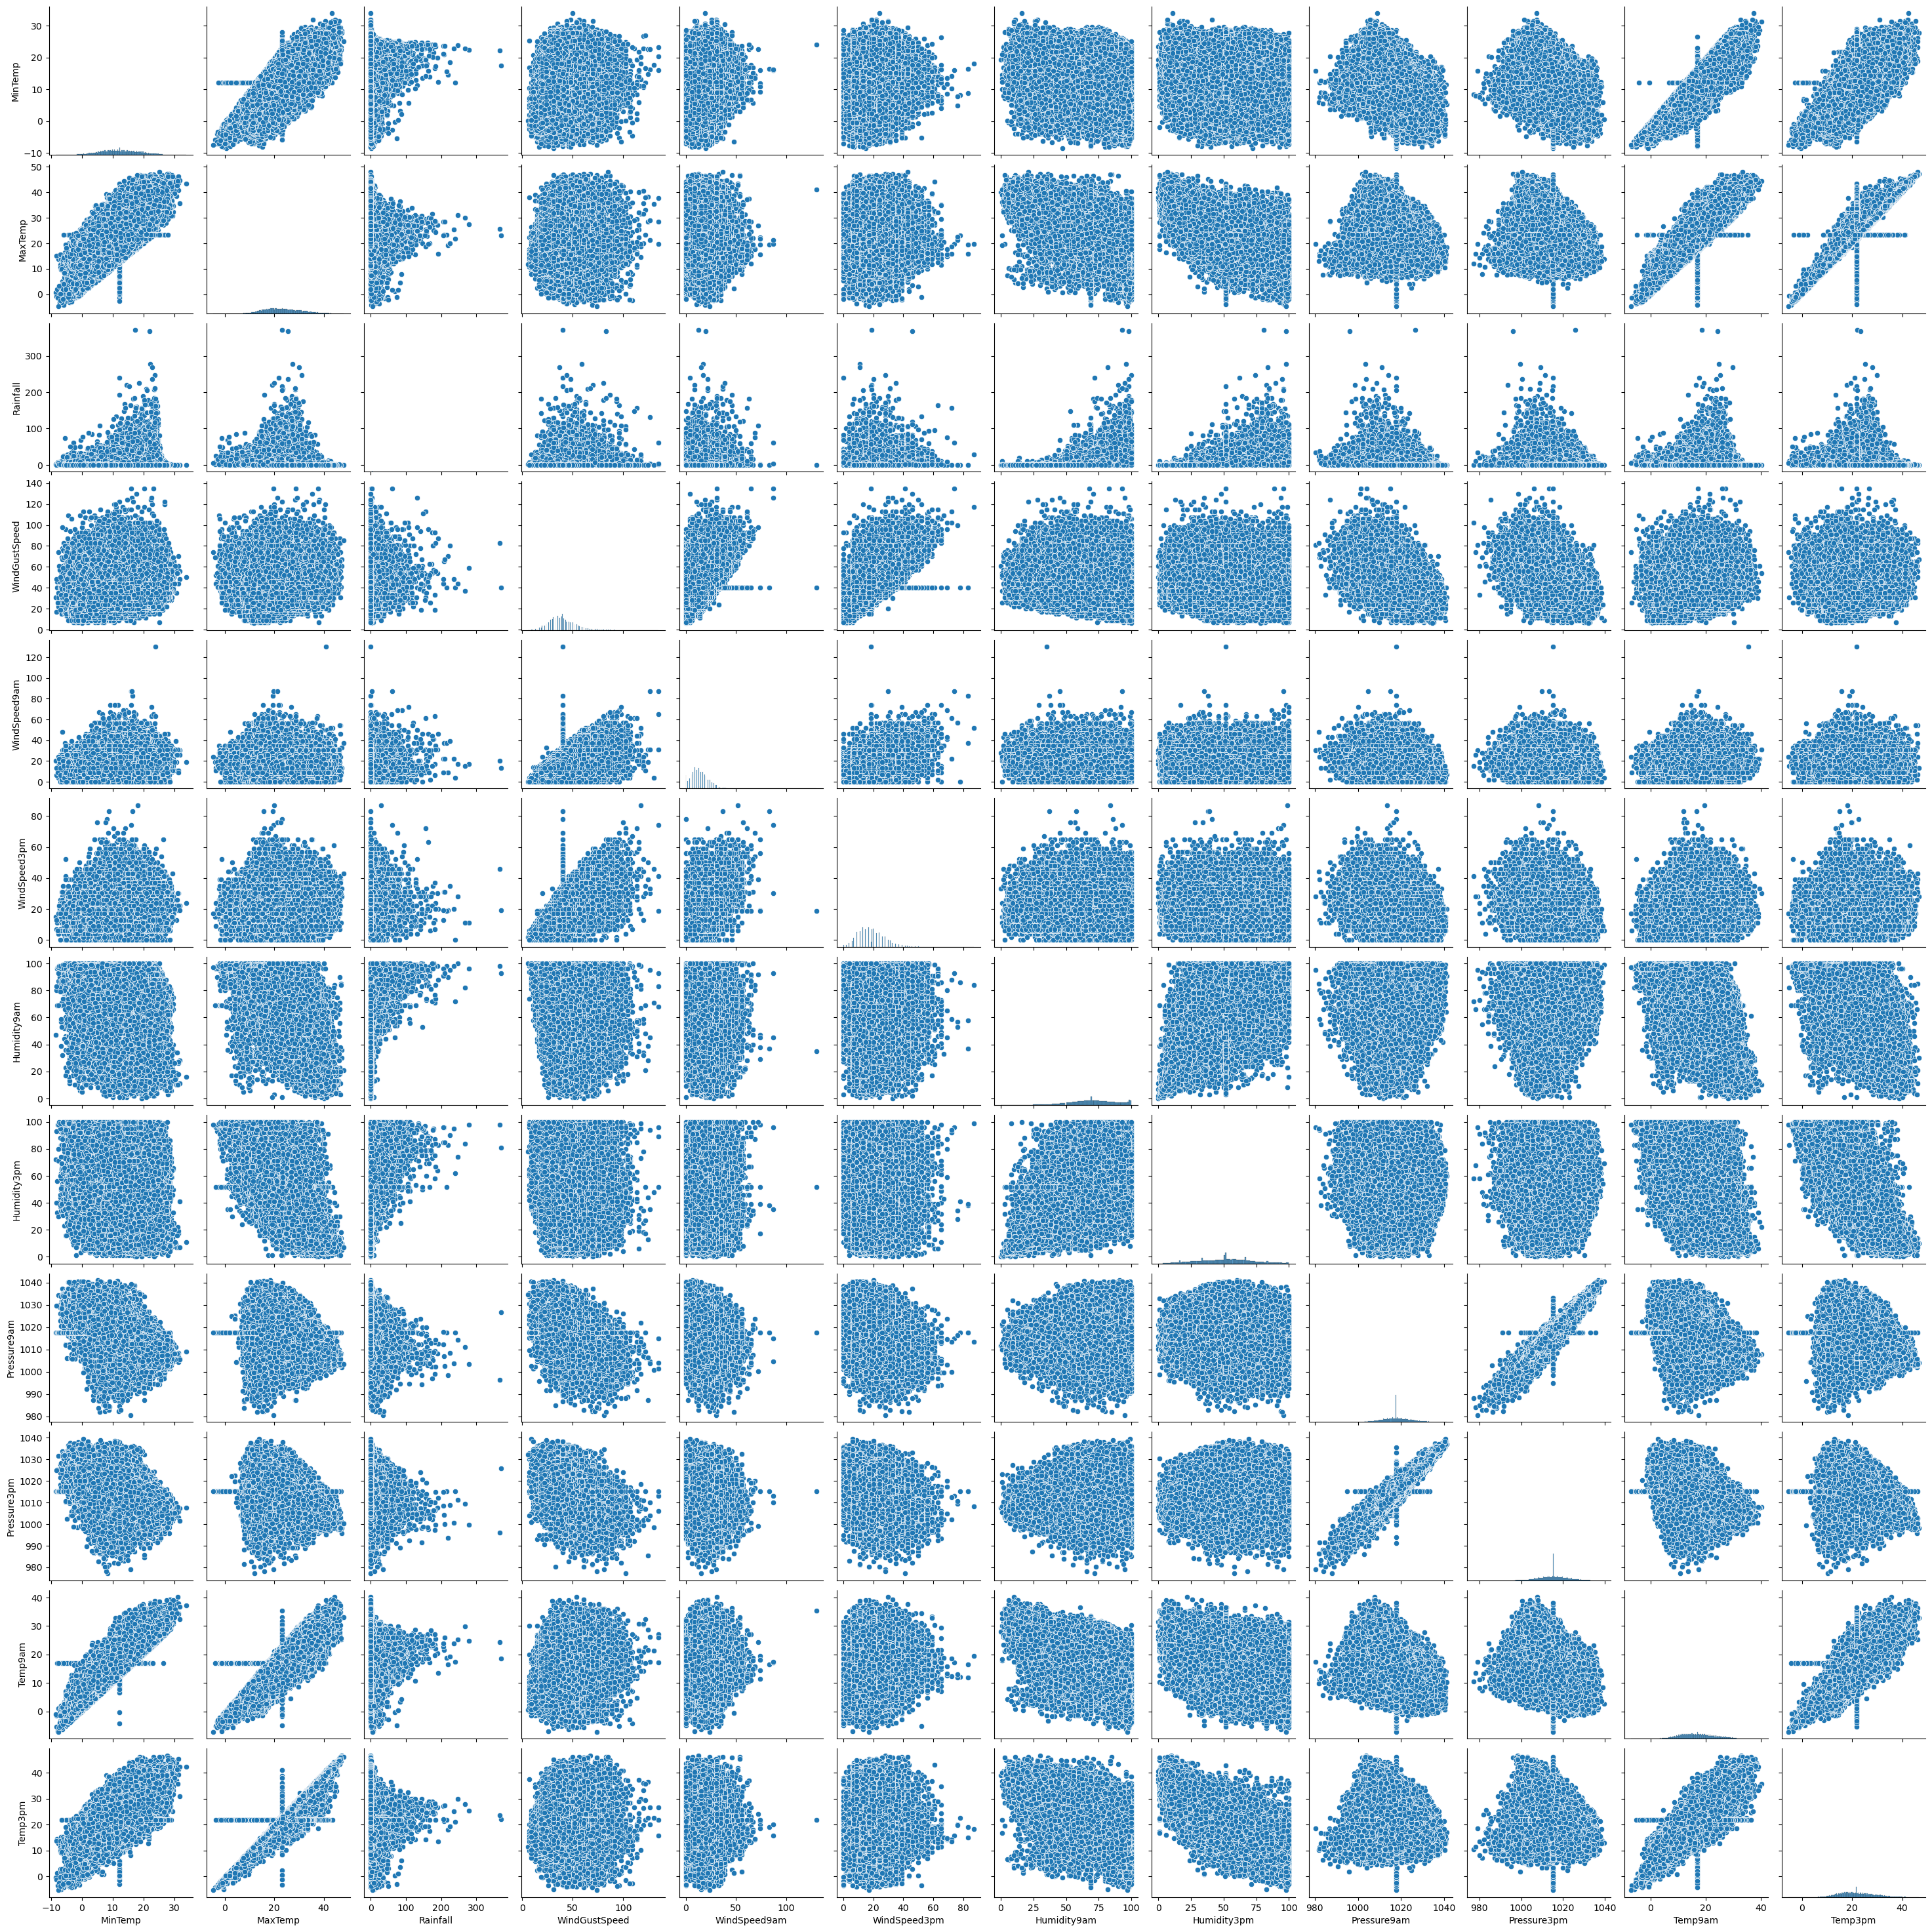

In [28]:
sns.pairplot(data)

<Axes: >

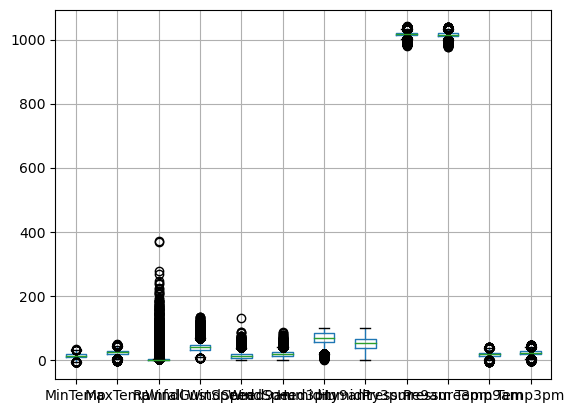

In [29]:
data.boxplot()

In [30]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [31]:
x

Date Location  MinTemp    MaxTemp  Rainfall  WindGustSpeed  \
0       2008-12-01    Delhi     13.4  22.900000       0.6       44.00000   
1       2008-12-02    Delhi      7.4  25.100000       0.0       44.00000   
2       2008-12-03    Delhi     12.9  25.700000       0.0       46.00000   
3       2008-12-04    Delhi      9.2  28.000000       0.0       24.00000   
4       2008-12-05    Delhi     17.5  32.300000       1.0       41.00000   
...            ...      ...      ...        ...       ...            ...   
145455  2017-06-21    Uluru      2.8  23.400000       0.0       31.00000   
145456  2017-06-22    Uluru      3.6  25.300000       0.0       22.00000   
145457  2017-06-23    Uluru      5.4  26.900000       0.0       37.00000   
145458  2017-06-24    Uluru      7.8  27.000000       0.0       28.00000   
145459  2017-06-25    Uluru     14.9  23.221348       0.0       40.03523   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Temp9am  Temp3pm RainToday WindGustDir WindDir9am  \
0            1007.1     16.9     21.8        No           W          W   
1            1007.8     17.2     24.3        No         WNW        NNW   
2            1008.7     21.0     23.2        No         WSW          W   
3            1012.8     18.1     26.5        No          NE         SE   
4            1006.0     17.8     29.7        No           W        ENE   
...             ...      ...      ...       ...         ...        ...   
145455       1020.3     10.1     22.4        No           E         SE   
145456       1019.1     10.9     24.5        No         NNW         SE   
145457       1016.8     12.5     26.1        No           N         SE   
145458       1016.5     15.1     26.0        No          SE        SSE   
145459       1017.9     15.0     20.9        No           W        ESE   

       WindDir3pm  
0             WNW  
1             WSW  
2             WSW  
3               E  
4              NW  
...           ...  
145455        ENE  
145456          N  
145457        WNW  
145458          N  
145459        ESE  

[145460 rows x 18 columns]

In [32]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainTomorrow, Length: 145460, dtype: object

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [35]:
names = x.columns
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [36]:
sc = StandardScaler()
sc

StandardScaler()

In [37]:

x_without_date = x.drop(columns=['Date'])

x_categorical = x_without_date.select_dtypes(include=['object'])
x_numerical = x_without_date.select_dtypes(exclude=['object'])

x_categorical_encoded = pd.get_dummies(x_categorical)


x_encoded = pd.concat([x_numerical, x_categorical_encoded], axis=1)

sc = StandardScaler()
x_scaled = sc.fit_transform(x_encoded)
x_scaled

array([[ 1.89446615e-01, -4.53363105e-02, -2.10071794e-01, ...,
        -2.73304289e-01,  3.92322649e+00, -2.64603767e-01],
       [-7.53100728e-01,  2.65043084e-01, -2.81649838e-01, ...,
        -2.73304289e-01, -2.54892243e-01,  3.77923569e+00],
       [ 1.10901003e-01,  3.49692009e-01, -2.81649838e-01, ...,
        -2.73304289e-01, -2.54892243e-01,  3.77923569e+00],
       ...,
       [-1.06728318e+00,  5.18989861e-01, -2.81649838e-01, ...,
        -2.73304289e-01,  3.92322649e+00, -2.64603767e-01],
       [-6.90264238e-01,  5.33098015e-01, -2.81649838e-01, ...,
        -2.73304289e-01, -2.54892243e-01, -2.64603767e-01],
       [ 4.25083451e-01, -5.01222327e-16, -2.81649838e-01, ...,
        -2.73304289e-01, -2.54892243e-01, -2.64603767e-01]])

In [38]:
x=pd.DataFrame(x,columns=names)

In [39]:
from sklearn import model_selection

In [40]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.2,random_state = 0)

In [41]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [42]:
XGBoost = xgboost.XGBRFClassifier()

Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [43]:
#x_train_numeric = x_train.drop(['Date', 'Location', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_train['Location'] = label_encoder.fit_transform(x_train['Location'])
x_train['RainToday'] = label_encoder.fit_transform(x_train['RainToday'])
x_train['WindGustDir'] = label_encoder.fit_transform(x_train['WindGustDir'])
x_train['WindDir9am'] = label_encoder.fit_transform(x_train['WindDir9am'])
x_train['WindDir3pm'] = label_encoder.fit_transform(x_train['WindDir3pm'])


x_train['Date'] = pd.to_datetime(x_train['Date'])
x_train['Year'] = x_train['Date'].dt.year
x_train['Month'] = x_train['Date'].dt.month
x_train['Day'] = x_train['Date'].dt.day

x_train.drop('Date', axis=1, inplace=True)


y_train = y_train.replace({'No': 0, 'Yes': 1})

In [44]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [45]:
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)


In [46]:
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

xgboost: 0.8446566066272515
Rand_forest: 0.9999828131445071
svm: 0.8201395572666025
Dtree: 1.0
GBM: 0.84941736559879
log: 0.8390880654475458


In [47]:
print(x_test.shape)
print(x_test.dtypes)


(29092, 18)
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
WindGustDir       object
WindDir9am        object
WindDir3pm        object
dtype: object


In [48]:
print(x_test.isnull().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
dtype: int64


In [49]:
df_encoded = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], drop_first=True)


In [50]:
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_test['Location'] = label_encoder.fit_transform(x_test['Location'])
x_test['RainToday'] = label_encoder.fit_transform(x_test['RainToday'])
x_test['WindGustDir'] = label_encoder.fit_transform(x_test['WindGustDir'])
x_test['WindDir9am'] = label_encoder.fit_transform(x_test['WindDir9am'])
x_test['WindDir3pm'] = label_encoder.fit_transform(x_test['WindDir3pm'])


x_test['Date'] = pd.to_datetime(x_test['Date'])
x_test['Year'] = x_test['Date'].dt.year
x_test['Month'] = x_test['Date'].dt.month
x_test['Day'] = x_test['Date'].dt.day

x_test.drop('Date', axis=1, inplace=True)


y_test = y_test.replace({'No': 0, 'Yes': 1})

In [53]:
XGBoost.fit(x_test,y_test)
Rand_forest.fit(x_test,y_test)
svm.fit(x_test,y_test)
Dtree.fit(x_test,y_test)
GBM.fit(x_test,y_test)
log.fit(x_test,y_test)

LogisticRegression()

In [54]:
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = svm.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

In [55]:
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
print("svm:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM:",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.8508524680324487
Rand_forest: 0.9999656262890142
svm: 0.781623814106971
Dtree: 1.0
GBM: 0.8540148494431459
log: 0.8383404372336037


In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


In [57]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

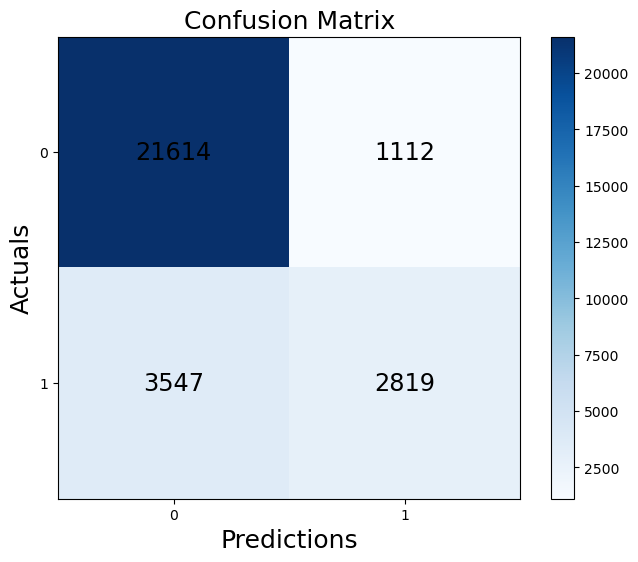

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)


ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))
              
ax.set_xticklabels(np.arange(conf_matrix.shape[1]))
ax.set_yticklabels(np.arange(conf_matrix.shape[0]))


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.colorbar(im)

plt.show()


In [59]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


conf_matrix = metrics.confusion_matrix(y_test, y_pred)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)


In [60]:
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

Confusion Matrix:
[[21614  1112]
 [ 3547  2819]]
Accuracy: 0.8398528805169806
Precision: 0.7171203256168914
Recall: 0.44282123782595034


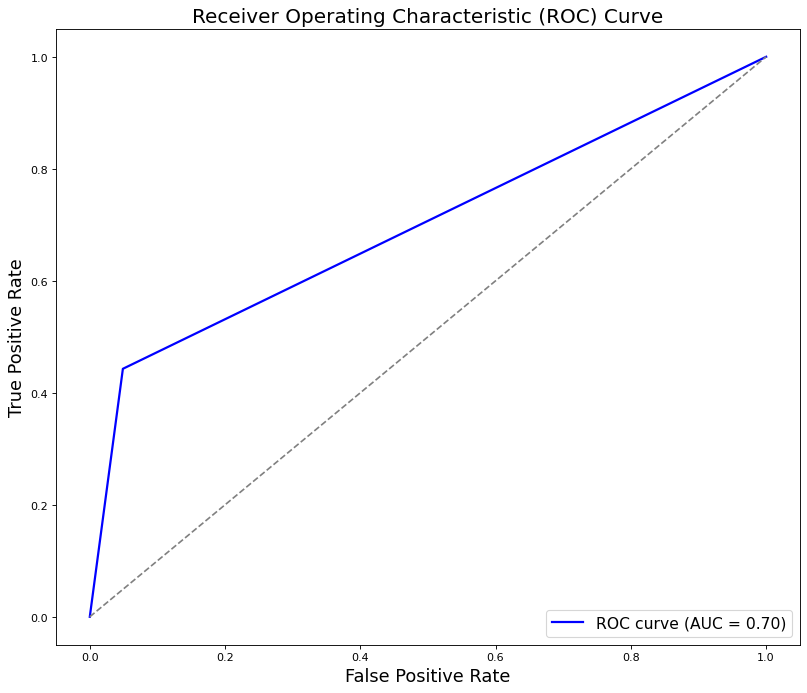

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt


auc = metrics.roc_auc_score(y_test, y_pred)


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)


plt.figure(figsize=(12, 10), dpi=80)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()


In [62]:
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
le.fit(y_pred)


imp_mode = SimpleImputer(strategy='most_frequent')

imp_mode.fit(x_train) 


sc = StandardScaler()

sc.fit(x_train)

with open('rainfall.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('imputer.pkl', 'wb') as f:
    pickle.dump(imp_mode, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
